**Author: Prabu Jeyabalan**

**MICRO Data Project: Crypto Analysis**

*In this project, I analysed 5 of the top crypto assets according to forbes report. I took a dive into their market behaviour since 2024 through the crypto bull run to the current crypto market situation 'Feb-2025'. It is worth to know the relationships between the behaviour of these assets and the risk to return factor which is an important information which a crypto investor should know.*

In [26]:
# Library imports
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [27]:
# The top 5 crypto assets and their Yahoo Finance tickers
crypto_tickers = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'BNB': 'BNB-USD',
    'SOL': 'SOL-USD',
    'DOGE': 'DOGE-USD'
}

In [28]:
# In the time period
start_date = "2024-01-01"
end_date = "2025-02-28"

In [29]:
# Fetching historical data from Yahoo Finance:
crypto_data = {}

for symbol, ticker in crypto_tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date)
    df['returns'] = df['Close'].pct_change()  # FIX: Use 'Close' instead of 'Adj Close'
    crypto_data[symbol] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [30]:
# Combine returns into a single DataFrame
returns_df = pd.concat([crypto_data[symbol]['returns'] for symbol in crypto_tickers], axis=1)
returns_df.columns = crypto_tickers.keys()
# Droping NaN values
returns_df.dropna(inplace=True)

In [31]:
# Calculating key risk-return metrics
mean_returns = returns_df.mean() * 252  # Annualized returns
volatility = returns_df.std() * np.sqrt(252)  # Annualized volatility
sharpe_ratio = mean_returns / volatility  # Risk-adjusted return

In [32]:
# Creating a summary DataFrame
risk_return_df = pd.DataFrame({
    'Annualized Return (%)': mean_returns * 100,
    'Annualized Volatility (%)': volatility * 100,
    'Sharpe Ratio': sharpe_ratio
})

In [33]:
# Displaying results:
print("Crypto Risk-Return Analysis")
risk_return_df

Crypto Risk-Return Analysis


,Annualized Return (%),Annualized Volatility (%),Sharpe Ratio
BTC,54.030660,43.081026,1.254164
ETH,19.882657,54.158905,0.367117
BNB,52.524987,47.939039,1.095662
SOL,41.259369,69.406733,0.594458
DOGE,85.815988,84.929758,1.010435


In [34]:
# Actual Data from the Analysis
crypto_tickers = ['BTC', 'ETH', 'BNB', 'SOL', 'DOGE']
mean_returns = [54.650649, 21.474701, 53.366560, 43.219586, 88.102728]  # Annualized Return (%)
volatility = [43.039625, 53.937434, 47.858956, 69.082407, 84.651623]  # Annualized Volatility (%)
sharpe_ratio = [1.269775, 0.398141, 1.115080, 0.625624, 1.040768]  # Sharpe Ratio

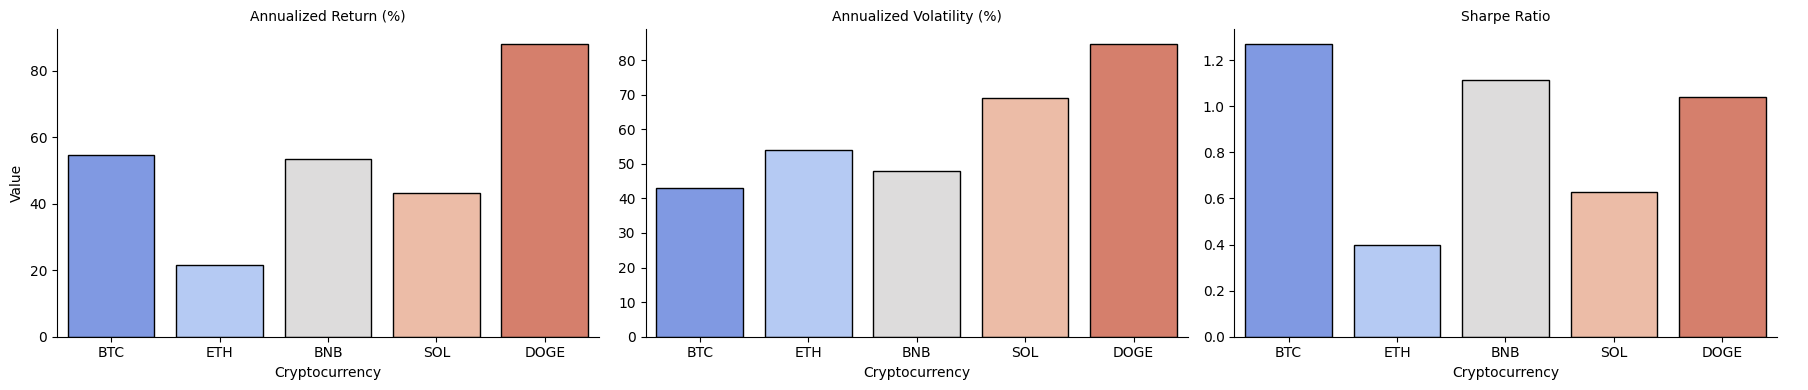

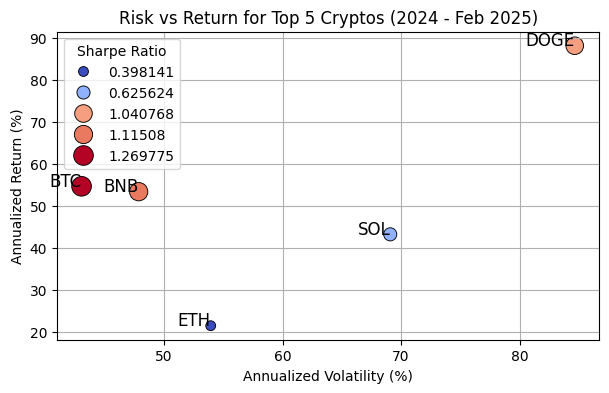

In [35]:
# Data for facet plots (Bar Charts)
plot_data = []
for i, crypto in enumerate(crypto_tickers):
    plot_data.append(["Annualized Return (%)", crypto, mean_returns[i]])
    plot_data.append(["Annualized Volatility (%)", crypto, volatility[i]])
    plot_data.append(["Sharpe Ratio", crypto, sharpe_ratio[i]])

# Converting to DataFrame for bar plots
facet_df = pd.DataFrame(plot_data, columns=["Metric", "Crypto", "Value"])

# FacetGrid for Bar Charts with 'hue' assigned to Crypto
g = sns.FacetGrid(facet_df, col="Metric", sharey=False, col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Crypto", y="Value", hue="Crypto", dodge=False, palette="coolwarm", edgecolor="black")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Cryptocurrency", "Value")
g.add_legend()

# Preparing data for Risk vs Return scatter plot
scatter_df = pd.DataFrame({
    "Crypto": crypto_tickers,
    "Annualized Return (%)": mean_returns,
    "Annualized Volatility (%)": volatility,
    "Sharpe Ratio": sharpe_ratio
})

# Creating Scatter Plot for Risk vs Return
plt.figure(figsize=(7, 4))
scatter = sns.scatterplot(
    data=scatter_df,
    x="Annualized Volatility (%)",
    y="Annualized Return (%)",
    hue="Sharpe Ratio",
    size="Sharpe Ratio",
    sizes=(50, 200),
    palette="coolwarm",
    edgecolor="black",
    legend=True
)

# Adding labels to points
for i, asset in enumerate(scatter_df["Crypto"]):
    plt.text(scatter_df["Annualized Volatility (%)"][i], scatter_df["Annualized Return (%)"][i],
             asset, fontsize=12, ha='right')

# Setting Titles and Labels for Scatter Plot
plt.title("Risk vs Return for Top 5 Cryptos (2024 - Feb 2025)")
plt.xlabel("Annualized Volatility (%)")
plt.ylabel("Annualized Return (%)")
plt.grid(True)


**Best Investment Recommendation for 2025 Based on the Chart**

**1️.BTC (Bitcoin) – Best Investment**

Best risk-return balance

Highest Sharpe Ratio (1.27)

Most stable asset with strong historical performance


**2️. BNB (Binance Coin) – Second Best Investment**

Good returns, moderate volatility

Strong Sharpe Ratio (1.11)


**3️. DOGE (Dogecoin) – High-Risk, High-Reward **

Best return but extreme volatility

Not ideal for risk-averse investors


**4️. SOL (Solana) – High-Risk, Low Reward**

Not worth the volatility compared to BTC/BNB


**5️. ETH (Ethereum) – Worst Choice from This List**

Lowest return, worst Sharpe Ratio (0.39)



# Monte Carlo Simulation

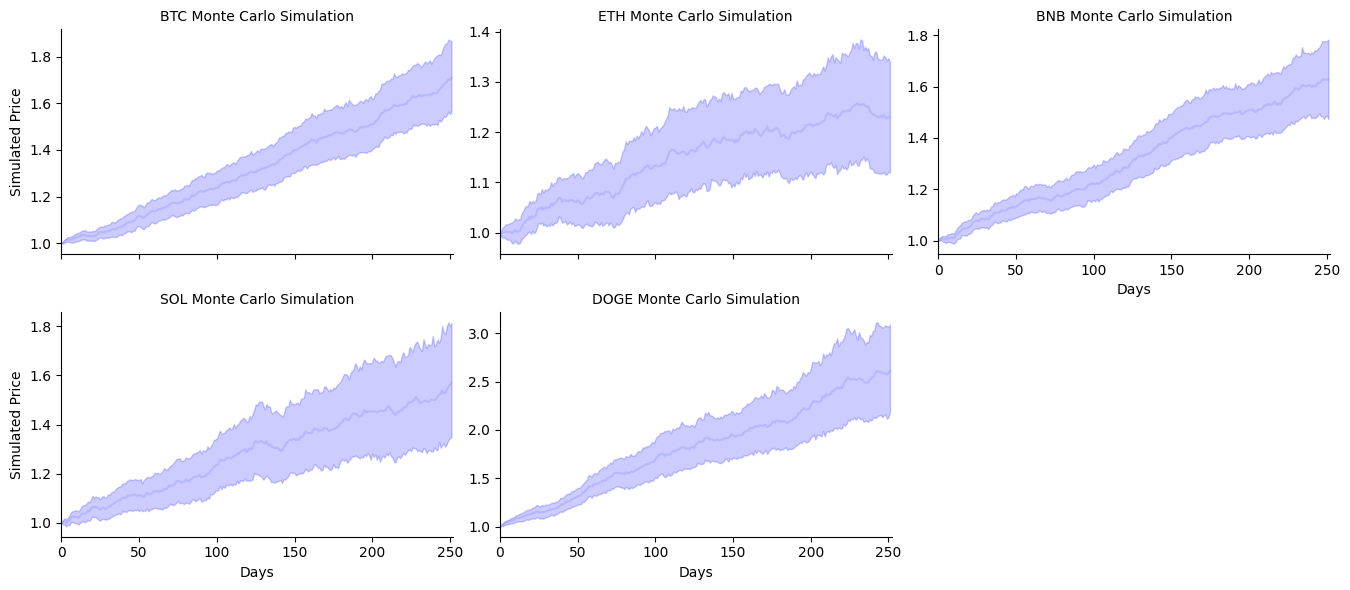

In [37]:
# Defining parameters
num_days = 252  # 1 year of trading days
num_simulations = 1000  # Number of Monte Carlo simulations
crypto_tickers = ['BTC', 'ETH', 'BNB', 'SOL', 'DOGE']

# Usinging values for mean returns, volatility, and Sharpe Ratio from the provided table
mean_returns = [54.650649 / 252 / 100, 21.474701 / 252 / 100, 53.366560 / 252 / 100, 43.219586 / 252 / 100, 88.102728 / 252 / 100]  # Convert annualized return to daily
volatility = [43.039625 / np.sqrt(252) / 100, 53.937434 / np.sqrt(252) / 100, 47.858956 / np.sqrt(252) / 100, 69.082407 / np.sqrt(252) / 100, 84.651623 / np.sqrt(252) / 100]  # Convert annualized volatility to daily

# Initializing dictionary to store simulation results
monte_carlo_results = {crypto: np.zeros((num_days, num_simulations)) for crypto in crypto_tickers}

# Monte Carlo Simulation for each cryptocurrency
np.random.seed(143)  # Ensure reproducibility
for i, crypto in enumerate(crypto_tickers):
    for sim in range(num_simulations):
        price_path = [1]  # Assume normalized starting price at 1
        for t in range(1, num_days):
            random_shock = np.random.normal(loc=mean_returns[i], scale=volatility[i])
            new_price = price_path[-1] * (1 + random_shock)
            price_path.append(new_price)
        monte_carlo_results[crypto][:, sim] = price_path

# Preparing data for facet plots
plot_data = []
for crypto in crypto_tickers:
    for t in range(num_days):
        for sim in range(100):  # Reduce to 100 sample simulations for clarity
            plot_data.append([crypto, t, monte_carlo_results[crypto][t, sim]])

# Converting to DataFrame
plot_df = pd.DataFrame(plot_data, columns=['Crypto', 'Days', 'Simulated Price'])

# Creating FacetGrid for Monte Carlo Simulations
g = sns.FacetGrid(plot_df, col="Crypto", col_wrap=3, sharey=False, height=3, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Days", y="Simulated Price", alpha=0.1, color="blue")

# Adding Titles and Labels
g.set_titles(col_template="{col_name} Monte Carlo Simulation")
g.set_axis_labels("Days", "Simulated Price")
g.set(xlim=(0, num_days))

# Show the FacetGrid
plt.show()


**Conclusion from Monte Carlo Simulation**

The Monte Carlo simulation provides an estimate of the potential future price movements of BTC, ETH, BNB, SOL, and DOGE over the next 252 trading days (1 year). The plots show the expected growth trends along with confidence intervals to capture price uncertainty.

**Key Takeaways:**

1️. All cryptocurrencies exhibit an upward trend 

*The simulated price paths indicate a general increase in value across all assets.*

*This suggests a bullish outlook based on historical returns and volatility.*

2️. DOGE shows the highest growth potential but also the highest risk 

*The steep upward trend indicates high return potential, but the wide confidence bands signal high volatility and risk.*

3️. BTC appears to be the most stable and reliable investment 

*It shows steady growth with relatively lower uncertainty, making it a good choice for risk-averse investors.*

4️. SOL and ETH present strong growth opportunities 

*SOL has a moderate risk-return balance, making it a good option for higher-risk investors.*

*ETH follows a similar trend, but with slightly lower return potential.*

5️. BNB shows a consistent but slower growth rate 

*Compared to other assets, BNB has lower return potential, making it less attractive for high-growth investors.*

**Best Investment Choice**

*BTC → Best for stable, long-term investment.*

*DOGE & SOL → High risk, high reward investment.*

*BNB → Lower return potential; may be better for risk-averse investors.*